<a href="https://colab.research.google.com/github/SonKayyum/UrbanSoundsClassification/blob/main/UrbanSounds8K_Spectrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Spektrogramların nasıl oluşturulabileceğine dair kısmı oluşturmaktadır. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!tar -xvf 'drive/MyDrive/UrbanSound8K.tar.gz'

Görüntülenen çıkış son 5000 satıra kısaltıldı.
UrbanSound8K/audio/fold4/17480-2-0-6.wav
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio/fol

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import time
import os

In [ ]:
df = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def create_spectrogram(y):
  spec= librosa.feature.melspectrogram(y=y)
  spec_conv=librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv

In [ ]:
for etiket in range(10):
  os.mkdir("/content/drive/My Drive/s_images"+"/"+str(etiket))

In [ ]:
ses, sr = librosa.load("/content/UrbanSound8K/audio/fold2/14780-9-0-1.wav")
ses=create_spectrogram(ses)

In [ ]:
librosa.display.specshow(ses, sr= sr)
plt.savefig("/content/drive/My Drive/images1.png", pad_inches = 0, bbox_inches = 'tight')
plt.close()

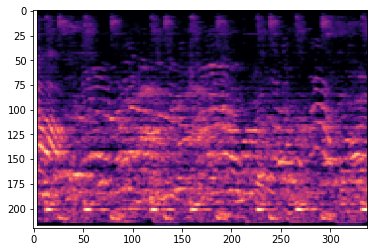

In [ ]:
ornek_s=plt.imread("/content/drive/My Drive/images1.png")
plt.imshow(ornek_s)
plt.show()

In [ ]:
for fold in range(1,11):
  fold_iter="/content/UrbanSound8K/audio/fold"+str(fold)

  for ses_dosyasi in os.listdir(fold_iter):
    if ses_dosyasi.endswith(".wav"):
        ses_isim=ses_dosyasi.split(".")[0]

        etiket=ses_dosyasi.split("-")[1]

        audio, sr = librosa.load(fold_iter + "/" + ses_dosyasi)
        spec=create_spectrogram(audio)
        librosa.display.specshow(spec, sr= sr)
        plt.savefig("/content/drive/My Drive/s_images/"+etiket+"/"+ses_isim+".png", pad_inches = 0, bbox_inches = 'tight')
        plt.close()